## Simulating alignments of 100bp reads from 150bp reads

#### Executive Summary

**20170817**

I made a reference genome from the ipyrad assembly output of 25 scallops from 5 different populations, and aligned an individual fastq file with 150bp reads as well as a trimmed version of the same fastq file, with 100bp reads. 
<br>
<br>
**[1]** ``bowtie2`` output suggests that 100bp and 150bp are extremely comparable. Almost the same number of reads aligned, and a very small number of 100bp reads aligned to multiple loci (0.1%). See below.

**100bp**
``4579335 reads; of these:
  4579335 (100.00%) were unpaired; of these:
    3331857 (72.76%) aligned 0 times
    1242720 (27.14%) aligned exactly 1 time
    4758 (0.10%) aligned >1 times
27.24% overall alignment rate``

**150bp**
``
4579335 reads; of these:
  4579335 (100.00%) were unpaired; of these:
    3287146 (71.78%) aligned 0 times
    1292182 (28.22%) aligned exactly 1 time
    7 (0.00%) aligned >1 times
28.22% overall alignment rate
``
<br>
<br>
<br>
<br>
**[2]** I also compared the distribution of the mapping quality scores, and they too look incredibly comparable.

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_combined_lanes/Notebooks/imgs_for_notebooks/100_150bp_mapq_test_20170817.png?raw=true)

It looks like the high quality reads are those in the distribution starting around MAPQ score of 170, and ending around 230. They look slightly different, but for our intent probably will work equally well for clustering. I zoomed in on this distribution here:

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_combined_lanes/Notebooks/imgs_for_notebooks/100_150bp_mapq_test_zoom_20170817.png?raw=true)

**Conclusion** I think it's ok to use 100bp sequencing.
<br>
<br>

_______________________________________________________________

**20170817**

Lorenz wants to know whether we can sequence 100bp reads for Molly's lane and project instead of 150bp, but we were worried that the clustering and aligning might be less effective given the great genetic variation in bivalves. So, to predict how many loci we'll have with 100bp reads, I'm going to make a reference genome, then align an individual fastq file with 150bp reads, and then separately align a 100bp version of the same fastq file, and compare how well each aligned. Ideally, the vast majority of loci in the reference genome should align to both 100bp and 150bp. 

Here are some readings I used to figure out how mapping scores work, etc.:
- [this blog post](http://www.acgt.me/blog/2014/12/16/understanding-mapq-scores-in-sam-files-does-37-42)
- [this bowtie2 aligner manual page, explains difference between alignment and mapping scores](http://bowtie-bio.sourceforge.net/bowtie2/manual.shtml#the-bowtie2-aligner)
- [this forum article Dan sent me on defining mapping scores](http://seqanswers.com/forums/showthread.php?t=66634)

**[1]** I made a reference genome from an assembly of 25 scallops, from 5 different populations, at 80% clustering similarity.

In [5]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad


In [7]:
!head cragig_c80_refgen_20170816.fa -n 8

>10
AGACGAAGTTACTCACTTGCTGAACAGATATGCTTTCTATCCACCTGGAACTATTTAAGCCACACATTCTAGGGACAAAACATGTTCTCTTTCCGAAGATTTCTCTATCATTGCTAAGGAGTCGTTCGTATCTTAGCA
>11
TCTGATATTAAGAATAGAATACACATGCTGTTGCCCCACTGCATGTACAATAAAATGCGACTAATGTGGGACACCTCCTGCAGAATTGGGGATTTATTTTTGTAACTTCTACTCGAAGGACAAAAAGAAGCGATGAAA
>14
GACGAATGAATACTTCGAACAAGTATTAGAAATTGATTTACAATTGAATGTAAGCTAACCTTTACACATTTTTTATTTGTACAGAAAAGACTTTGACAAGTAGTAAACAAGAAGTTATTACAGTAAGGCAAGTACAAT
>19
AACCCTAACTTGTACAATCTCTTCATCACTTGTGAAGAAGATACCACGTAGGTACTGATCCACAGAGATTTCAGGTAGTTCCTGTTTAGTTCCACAAGTTGTCCTCAAGTTGTATTGAATCACTACCTGTAAGTCTAC


**[2]** I need to pick an individual fastq file with 150bp reads, and trim one copy to 140 bp and a second copy to 90 bp. It looks like [``seqtk``](https://github.com/lh3/seqtk) will be the easiest way to trim fastq files. Just installed it.

In [8]:
!seqtk


Usage:   seqtk <command> <arguments>
Version: 1.0-r31

Command: seq       common transformation of FASTA/Q
         comp      get the nucleotide composition of FASTA/Q
         sample    subsample sequences
         subseq    extract subsequences from FASTA/Q
         trimfq    trim FASTQ using the Phred algorithm

         hety      regional heterozygosity
         mutfa     point mutate FASTA at specified positions
         mergefa   merge two FASTA/Q files
         randbase  choose a random base from hets
         cutN      cut sequence at long N
         listhet   extract the position of each het



I copied an individual fastq into the directory, made a copy of it, and name them 150bp and 100bp test.

In [10]:
!ls *.fastq

FG001_100bp_test.fastq	FG001_150bp_test.fastq


In [16]:
!seqtk trimfq -e 4 FG001_150bp_test.fastq > FG001_150bp_trmd_test.fastq

In [17]:
!seqtk trimfq -e 54 FG001_100bp_test.fastq > FG001_100bp_trmd_test.fastq

Check that the sequence lengths make sense:

In [18]:
!head FG001_100bp_trmd_test.fastq -n 12

@K00137:384:HCYV5BBXX:5:1102:3325:9016 1:N:0:AAAATACA_AGATCTCG
TGCAGGTATTGTACCTGGTGCACCCAATTTCATGATCGTAAGAGGCGACTTAATTTGGATCTTATCTTTTCTCTTCTTTCTAAATAACTT
+
AAFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
@K00137:384:HCYV5BBXX:5:1102:7060:9016 1:N:0:TTATAAAA_AGATCTCG
TGCAGGGTTGTGATGTTTTGGGTCGTTGTTAATCGATCTAAACACAGAGGAAATTTGATTTTCAATGGGATTATGAAAAACAAATCGAAA
+
FJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJ
@K00137:384:HCYV5BBXX:5:1102:10510:9016 1:N:0:TCGGGGGG_AGATCTCG
TGCAGGTAGGTCTATGAAGGTAGTCAGTATCACCAACAAAACCTTATGGCAAAGTCTCAGGGAAATCTGTGCTAAACAGTCAAGCTAGCC
+
FFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ


In [19]:
!head FG001_150bp_trmd_test.fastq -n 12

@K00137:384:HCYV5BBXX:5:1102:3325:9016 1:N:0:AAAATACA_AGATCTCG
TGCAGGTATTGTACCTGGTGCACCCAATTTCATGATCGTAAGAGGCGACTTAATTTGGATCTTATCTTTTCTCTTCTTTCTAAATAACTTTCTTCTTACTAATGTCTCCCTTGACAATGCCTCGCTTTTAACCTTATCTT
+
AAFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJFAJJ
@K00137:384:HCYV5BBXX:5:1102:7060:9016 1:N:0:TTATAAAA_AGATCTCG
TGCAGGGTTGTGATGTTTTGGGTCGTTGTTAATCGATCTAAACACAGAGGAAATTTGATTTTCAATGGGATTATGAAAAACAAATCGAAAGGTTAACCTTAGTAAGACTATTTATTGTGTGCGTATGATTTCTCCTACTC
+
FJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJFJJJFJFJFJJJFJ
@K00137:384:HCYV5BBXX:5:1102:10510:9016 1:N:0:TCGGGGGG_AGATCTCG
TGCAGGTAGGTCTATGAAGGTAGTCAGTATCACCAACAAAACCTTATGGCAAAGTCTCAGGGAAATCTGTGCTAAACAGTCAAGCTAGCCTGAAGATATTATAGACCAGCATGGACTCAGCTGTATCTTAAAATAAATCA
+
FFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ

Looks good! Now I need to align each fastq to the reference genome I made, using Bowtie2 which allows for indels.

In [20]:
!bowtie2

No index, query, or output file specified!
Bowtie 2 version 2.2.6 by Ben Langmead (langmea@cs.jhu.edu, www.cs.jhu.edu/~langmea)
Usage: 
  bowtie2 [options]* -x <bt2-idx> {-1 <m1> -2 <m2> | -U <r>} [-S <sam>]

  <bt2-idx>  Index filename prefix (minus trailing .X.bt2).
             NOTE: Bowtie 1 and Bowtie 2 indexes are not compatible.
  <m1>       Files with #1 mates, paired with files in <m2>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <m2>       Files with #2 mates, paired with files in <m1>.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <r>        Files with unpaired reads.
             Could be gzip'ed (extension: .gz) or bzip2'ed (extension: .bz2).
  <sam>      File for SAM output (default: stdout)

  <m1>, <m2>, <r> can be comma-separated lists (no whitespace) and can be
  specified many times.  E.g. '-U file1.fq,file2.fq -U file3.fq'.

Options (defaults in parentheses):

 Input:
  -q                 query in

Make bowtie2 index.

In [21]:
!bowtie2-build cragig_c80_refgen_20170816.fa cragig_refgen_20170817

Settings:
  Output files: "cragig_refgen_20170817.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  cragig_c80_refgen_20170816.fa
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 269665
Using parameters --bmax 202249 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 202249 --dcv 1024
Co

**[3]** Align each to the index, output as SAM

In [24]:
!bowtie2 -q -x cragig_refgen_20170817 -U FG001_100bp_trmd_test.fastq -S FG001_100bp_aln.sam

4579335 reads; of these:
  4579335 (100.00%) were unpaired; of these:
    3331874 (72.76%) aligned 0 times
    1242703 (27.14%) aligned exactly 1 time
    4758 (0.10%) aligned >1 times
27.24% overall alignment rate


In [25]:
!bowtie2 -q -x cragig_refgen_20170817 -U FG001_150bp_trmd_test.fastq -S FG001_150bp_aln.sam

4579335 reads; of these:
  4579335 (100.00%) were unpaired; of these:
    3287146 (71.78%) aligned 0 times
    1292182 (28.22%) aligned exactly 1 time
    7 (0.00%) aligned >1 times
28.22% overall alignment rate


**[4]** Convert to format for parsing (BED), so from SAM -> BAM and then from BAM -> BED

I got some notes from Mary on how she did this. SAM -> BAM requires samtools. Install with ``sudo apt-get install samtools``, and then BAM -> BED requires bedtools, and install with ``sudo apt-get install bedtools``.

In [26]:
!samtools


Program: samtools (Tools for alignments in the SAM format)
Version: 0.1.19-96b5f2294a

Usage:   samtools <command> [options]

Command: view        SAM<->BAM conversion
         sort        sort alignment file
         mpileup     multi-way pileup
         depth       compute the depth
         faidx       index/extract FASTA
         tview       text alignment viewer
         index       index alignment
         idxstats    BAM index stats (r595 or later)
         fixmate     fix mate information
         flagstat    simple stats
         calmd       recalculate MD/NM tags and '=' bases
         merge       merge sorted alignments
         rmdup       remove PCR duplicates
         reheader    replace BAM header
         cat         concatenate BAMs
         bedcov      read depth per BED region
         targetcut   cut fosmid regions (for fosmid pool only)
         phase       phase heterozygotes
         bamshuf     shuffle and group alignments by name



In [27]:
!bedtools

bedtools: flexible tools for genome arithmetic and DNA sequence analysis.
usage:    bedtools <subcommand> [options]

The bedtools sub-commands include:

[ Genome arithmetic ]
    intersect     Find overlapping intervals in various ways.
    window        Find overlapping intervals within a window around an interval.
    closest       Find the closest, potentially non-overlapping interval.
    coverage      Compute the coverage over defined intervals.
    map           Apply a function to a column for each overlapping interval.
    genomecov     Compute the coverage over an entire genome.
    merge         Combine overlapping/nearby intervals into a single interval.
    cluster       Cluster (but don't merge) overlapping/nearby intervals.
    complement    Extract intervals _not_ represented by an interval file.
    subtract      Remove intervals based on overlaps b/w two files.
    slop          Adjust the size of intervals.
    flank         Create new intervals from the flanks of exi

SAM -> BAM

In [28]:
!samtools view -bS FG001_100bp_aln.sam > FG001_100bp_aln.bam

[samopen] SAM header is present: 7811 sequences.


In [29]:
!samtools view -bS FG001_150bp_aln.sam > FG001_150bp_aln.bam

[samopen] SAM header is present: 7811 sequences.


BAM -> BED

In [79]:
!bedtools bamtobed -i FG001_100bp_aln.bam -tag AS > FG001_100bp_aln.bed

In [80]:
!bedtools bamtobed -i FG001_150bp_aln.bam -tag AS > FG001_150bp_aln.bed

Check it out.

In [36]:
!head FG001_100bp_aln.bed -n 10

8152	0	84	K00137:384:HCYV5BBXX:5:1102:18568:9016	0	+
16195	0	84	K00137:384:HCYV5BBXX:5:1102:24616:9016	3	+
14641	0	84	K00137:384:HCYV5BBXX:5:1102:1651:9033	23	+
36498	0	84	K00137:384:HCYV5BBXX:5:1102:16021:9033	0	+
10570	0	84	K00137:384:HCYV5BBXX:5:1102:18213:9033	0	+
9768	2	84	K00137:384:HCYV5BBXX:5:1102:19086:9033	3	+
2307	2	84	K00137:384:HCYV5BBXX:5:1102:25195:9033	0	+
9782	1	84	K00137:384:HCYV5BBXX:5:1102:25641:9033	3	+
23725	0	84	K00137:384:HCYV5BBXX:5:1102:27549:9033	8	+
25665	0	84	K00137:384:HCYV5BBXX:5:1102:32400:9033	0	+


In [34]:
!head FG001_150bp_aln.bed -n 10

8152	0	134	K00137:384:HCYV5BBXX:5:1102:18568:9016	23	+
16195	0	134	K00137:384:HCYV5BBXX:5:1102:24616:9016	23	+
14641	0	134	K00137:384:HCYV5BBXX:5:1102:1651:9033	24	+
36498	0	134	K00137:384:HCYV5BBXX:5:1102:16021:9033	23	+
10570	0	135	K00137:384:HCYV5BBXX:5:1102:18213:9033	3	+
9768	2	134	K00137:384:HCYV5BBXX:5:1102:19086:9033	23	+
2307	2	134	K00137:384:HCYV5BBXX:5:1102:25195:9033	8	+
9782	1	134	K00137:384:HCYV5BBXX:5:1102:25641:9033	23	+
23725	0	134	K00137:384:HCYV5BBXX:5:1102:27549:9033	24	+
25665	0	135	K00137:384:HCYV5BBXX:5:1102:32400:9033	0	+


**[5]** Parsing BED files to understand whether read alignment behavior differs for 100bp simulated and 150bp actual reads

First, I want to know the distribution of MAPQ scores for each BED file.

In [81]:
import matplotlib.pyplot as plt
import numpy as np

In [82]:
bed100 = open("FG001_100bp_aln.bed","r")
MAPQs_100 = []
for line in bed100:
    MAPQs_100.append(int(line.strip().split()[4]))
bed100.close()

bed150 = open("FG001_150bp_aln.bed","r")
MAPQs_150 = []
for line in bed150:
    MAPQs_150.append(int(line.strip().split()[4]))
bed150.close()

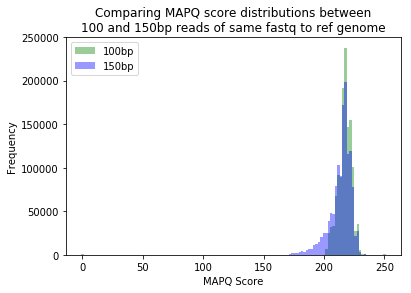

In [83]:
plt.hist(MAPQs_100, bins = np.arange(0,max(MAPQs_100), 2)-1,label="100bp", color="green",alpha = .4)
plt.hist(MAPQs_150, bins = np.arange(0,max(MAPQs_150), 2)-1,label="150bp", color="blue", alpha = .4)
plt.title('Comparing MAPQ score distributions between\n100 and 150bp reads of same fastq to ref genome')
plt.xlabel("MAPQ Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.close()

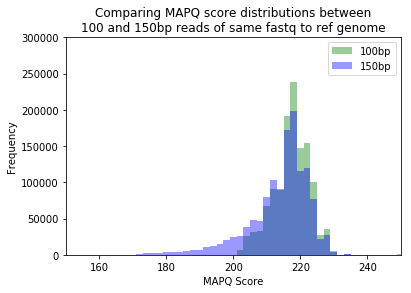

In [85]:
plt.hist(MAPQs_100, bins = np.arange(0,max(MAPQs_100), 2)-1,label="100bp", color="green",alpha = .4)
plt.hist(MAPQs_150, bins = np.arange(0,max(MAPQs_150), 2)-1,label="150bp", color="blue", alpha = .4)
plt.xlabel("MAPQ Score")
plt.ylabel("Frequency")
plt.title('Comparing MAPQ score distributions between\n100 and 150bp reads of same fastq to ref genome')
plt.xlim(150,250)
plt.ylim(0,300000)
plt.legend()
plt.show()
plt.close()

Second, I want to know whether reads aligned to more loci in the 100bp versions. So, I want to make a dictionary where each key is a read and each value is a list of the reference genome loci, and compare histograms between 100 and 150bp versions.

In [86]:
bed100 = open("FG001_100bp_aln.bed","r")
bed100_dict = {}

check = []

for line in bed100:
    linelist = line.strip().split()
    ref_ID = linelist[0]
    read_ID = linelist[3]
    if read_ID not in bed100_dict:
        bed100_dict[read_ID] = [ref_ID]
    else:
        bed100_dict[read_ID] += [ref_ID]
        check.append(linelist[5])
bed100.close()

bed100_match_counts = []
for read in bed100_dict.keys():
    bed100_match_counts.append(len(bed100_dict[read]))

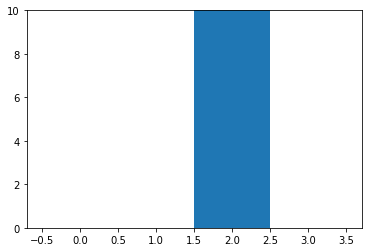

In [72]:
plt.hist(bed100_match_counts, bins = np.arange(0,5,1)-.5)
plt.ylim(0,10)
plt.show()

I just realized that I should have allowed for multiple reported alignments in my bowtie2 command, so will need to rerun. Let's allow for 10.

In [99]:
!bowtie2 -q -x cragig_refgen_20170817 -U FG001_100bp_trmd_test.fastq -S FG001_100bp_aln_r10.sam -k 10

4579335 reads; of these:
  4579335 (100.00%) were unpaired; of these:
    3331857 (72.76%) aligned 0 times
    1242720 (27.14%) aligned exactly 1 time
    4758 (0.10%) aligned >1 times
27.24% overall alignment rate


In [101]:
!bowtie2 -q -x cragig_refgen_20170817 -U FG001_150bp_trmd_test.fastq -S FG001_150bp_aln_r10.sam -k 10

4579335 reads; of these:
  4579335 (100.00%) were unpaired; of these:
    3287146 (71.78%) aligned 0 times
    1292182 (28.22%) aligned exactly 1 time
    7 (0.00%) aligned >1 times
28.22% overall alignment rate


In [90]:
!samtools view -bS FG001_100bp_aln_r10.sam > FG001_100bp_aln_r10.bam

[samopen] SAM header is present: 7811 sequences.


In [91]:
!samtools view -bS FG001_100bp_aln.sam > FG001_150bp_aln_r10.sam.bam

[samopen] SAM header is present: 7811 sequences.


In [95]:
!bedtools bamtobed -i FG001_100bp_aln.bam -tag AS > FG001_100bp_aln_r10.bed

In [96]:
!bedtools bamtobed -i FG001_100bp_aln.bam -tag AS > FG001_150bp_aln_r10.bed

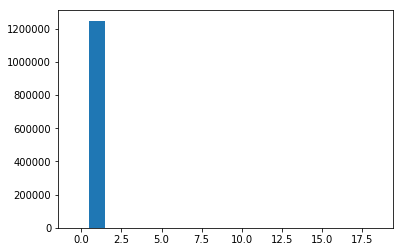

In [100]:
bed100 = open("FG001_100bp_aln_r10.bed","r")
bed100_dict = {}

check = []

for line in bed100:
    linelist = line.strip().split()
    ref_ID = linelist[0]
    read_ID = linelist[3]
    if read_ID not in bed100_dict:
        bed100_dict[read_ID] = [ref_ID]
    else:
        bed100_dict[read_ID] += [ref_ID]
        check.append(linelist[5])
bed100.close()

bed100_match_counts = []
for read in bed100_dict.keys():
    bed100_match_counts.append(len(bed100_dict[read]))
    
plt.hist(bed100_match_counts, bins = np.arange(0,20,1)-.5)
plt.show()